In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件


# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [3]:

# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:

# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

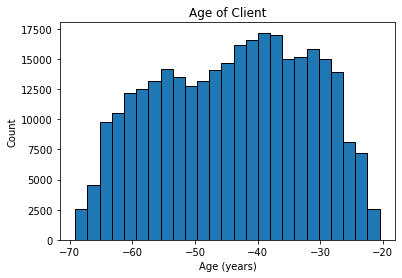

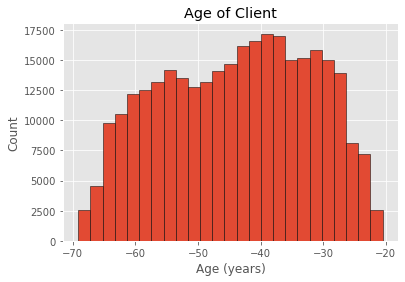

In [10]:

# 以生存年數繪製分布圖
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

# 改變繪圖樣式 (style)
plt.style.use('ggplot') 

# 改變樣式後再繪圖一次, 比較效果
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

In [17]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [23]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH']

bin_cut =  10
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut)
print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

(12811.0, 14585.0]    41758
(14585.0, 16359.0]    40350
(11037.0, 12811.0]    38430
(16359.0, 18133.0]    34335
(18133.0, 19907.0]    33546
(9263.0, 11037.0]     33120
(19907.0, 21681.0]    32635
(21681.0, 23455.0]    27687
(7471.26, 9263.0]     13686
(23455.0, 25229.0]    11964
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,9461,"(9263.0, 11037.0]"
1,0,16765,16765,"(16359.0, 18133.0]"
2,0,19046,19046,"(18133.0, 19907.0]"
3,0,19005,19005,"(18133.0, 19907.0]"
4,0,19932,19932,"(19907.0, 21681.0]"


In [24]:

age_data['YEARS_BINNED'].value_counts().sort_index()

(7471.26, 9263.0]     13686
(9263.0, 11037.0]     33120
(11037.0, 12811.0]    38430
(12811.0, 14585.0]    41758
(14585.0, 16359.0]    40350
(16359.0, 18133.0]    34335
(18133.0, 19907.0]    33546
(19907.0, 21681.0]    32635
(21681.0, 23455.0]    27687
(23455.0, 25229.0]    11964
Name: YEARS_BINNED, dtype: int64

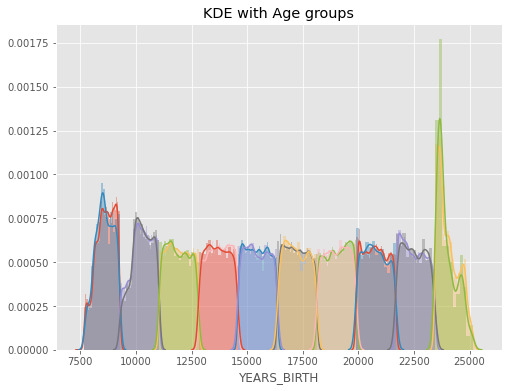

In [25]:
# 繪圖前先排序 / 分組
"""
Your Code Here
"""
year_group_sorted = age_data['YEARS_BINNED'].value_counts().sort_index().index

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

In [26]:

# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(7471.26, 9263.0]",0.121949,8606.472161,8606.472161
"(9263.0, 11037.0]",0.111413,10244.775000,10244.775000
"(11037.0, 12811.0]",0.101900,11913.765912,11913.765912
"(12811.0, 14585.0]",0.089468,13717.780090,13717.780090
"(14585.0, 16359.0]",0.078984,15459.271499,15459.271499
"(16359.0, 18133.0]",0.074472,17230.745304,17230.745304
"(18133.0, 19907.0]",0.067847,19045.809813,19045.809813
"(19907.0, 21681.0]",0.055952,20774.442408,20774.442408
"(21681.0, 23455.0]",0.052949,22521.964460,22521.964460


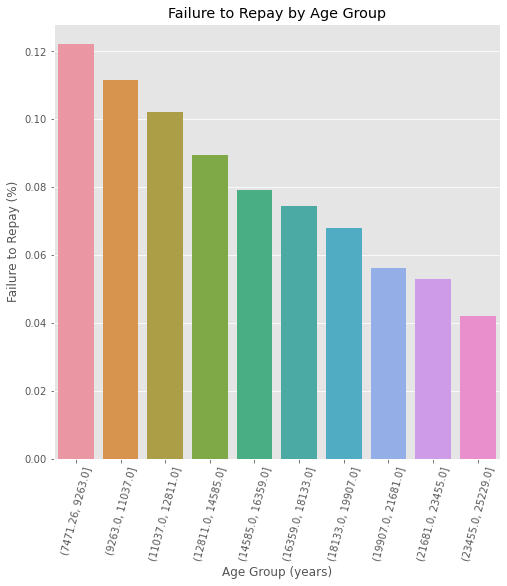

In [27]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = age_groups.index
py = age_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');